<a href="https://colab.research.google.com/github/rubyvanrooyen/notebooks/blob/main/application/wsclean_TART_MS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imaging TART MS using wsclean

Example WsClean implementation from `tart2ms` README

Important note:
Add GPU in Runtime type settings before running `wsclean`

## Operating system

Note colab runs 18.04 and indicated a reluctance to 20.04.   
Keep this in mind during development

In [1]:
!!cat /etc/*release 

['DISTRIB_ID=Ubuntu',
 'DISTRIB_RELEASE=18.04',
 'DISTRIB_CODENAME=bionic',
 'DISTRIB_DESCRIPTION="Ubuntu 18.04.6 LTS"',
 'NAME="Ubuntu"',
 'VERSION="18.04.6 LTS (Bionic Beaver)"',
 'ID=ubuntu',
 'ID_LIKE=debian',
 'PRETTY_NAME="Ubuntu 18.04.6 LTS"',
 'VERSION_ID="18.04"',
 'HOME_URL="https://www.ubuntu.com/"',
 'SUPPORT_URL="https://help.ubuntu.com/"',
 'BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"',
 'PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"',
 'VERSION_CODENAME=bionic',
 'UBUNTU_CODENAME=bionic']

### Include KERN repository

In [2]:
!apt-get install software-properties-common
!add-apt-repository -y -s ppa:kernsuite/kern-7

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.18).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.c

In [3]:
!apt-add-repository multiverse
!apt-add-repository restricted
!apt-get update

'multiverse' distribution component is already enabled for all sources.
'restricted' distribution component is already enabled for all sources.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://

## Installations

### CASA tools

In [4]:
!pip install python-casacore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 35.0 MB 1.3 MB/s 


### DASKMS tools

In [5]:
!pip install fsspec
!pip install dask-ms[xarray]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 5.1 MB/s 


In [6]:
import daskms

### WSClean 

In [7]:
!apt-get install wsclean

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  casacore-data casacore-data-igrf casacore-data-lines
  casacore-data-observatories casacore-data-sources casacore-data-tai-utc
  libcasa-casa2 libcasa-coordinates2 libcasa-fits2 libcasa-images2
  libcasa-lattices2 libcasa-measures2 libcasa-mirlib2 libcasa-ms2
  libcasa-python3-2 libcasa-scimath-f2 libcasa-scimath2 libcasa-tables2
  libcfitsio5 libfftw3-single3 libgsl23 libgslcblas0 libwcs5 libwsclean0
  python3-casacore python3-numpy python3-six
Suggested packages:
  casacore-data-eop casacore-data-jplde casacore-data-predict libfftw3-bin
  libfftw3-dev gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
  python-numpy-doc python3-nose python3-numpy-dbg wsclean-dev
The following NEW packages will be

In [8]:
!wsclean --help


WSClean version 2.5 (2017-12-01)
This software package is released under the GPL version 3.
Author: André Offringa (offringa@gmail.com).

Syntax: wsclean [options] <input-ms> [<2nd-ms> [..]]
Will create cleaned images of the input ms(es).
If multiple mses are specified, they need to be phase-rotated to the same point on the sky.

Options can be:

  ** GENERAL OPTIONS **
-version
   Print WSClean's version and exit.
-j <threads>
   Specify number of computing threads to use, i.e., number of cpu cores that will be used.
   Default: use all cpu cores.
-mem <percentage>
   Limit memory usage to the given fraction of the total system memory. This is an approximate value.
   Default: 100.
-abs-mem <memory limit>
   Like -mem, but this specifies a fixed amount of memory in gigabytes.
-verbose (or -v)
   Increase verbosity of output.
-log-time
   Add date and time to each line in the output.
-quiet
   Do not output anything but errors.
-reorder
-no-reorder
   Force or disable reordering of Me

### TART tools

In [9]:
!pip install tart2ms tart tart-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 7.2 MB/s 
     |████████████████████████████████| 23.7 MB 1.5 MB/s 


## Imaging using WsClean

Using the test example presented in the README of the
[tart2ms](https://github.com/tart-telescope/tart2ms)
repository.   
Example data file
[data_test.json](https://github.com/tart-telescope/tart2ms/blob/master/tart2ms/tests/data_test.json)
is also availible the repository

### Example TART data

Data files are read from Google Drive folder

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create a symbolic link to data file in content directory for ease of use

In [11]:
!ln -s "/content/drive/MyDrive/RARG/TART/data/data_test.json"

Convert example JSON file to a measurement set (MS)   

In [12]:
!tart2ms --json data_test.json --ms data_test.ms

Getting Data from file: data_test.json
Writing measurement set 'data_test.ms'...
2022-10-14 11:51:24,956 - root - INFO - Time 5071671511.991
/usr/local/lib/python3.7/dist-packages/astropy/time/utils.py:179: RuntimeWarning: overflow encountered in double_scalars
  c = 134217729. * a  # 2**27+1.
/usr/local/lib/python3.7/dist-packages/astropy/time/utils.py:181: RuntimeWarning: invalid value encountered in double_scalars
  ah = c - abig
|===========================================| 1.3k/1.3k (100.00%)         0s
|===========================================| 3.2M/3.2M (100.00%)         0s
2022-10-14 11:51:26,415 - root - INFO - Pol Feeds ['RR']
2022-10-14 11:51:26,415 - root - INFO - Correlation Types [[5]]
2022-10-14 11:51:26,435 - root - INFO - Pol Types ['RR']
2022-10-14 11:51:26,435 - root - INFO - Pol Responses [[0.7071067811865475, (-0-0.7071067811865475j)]]
2022-10-14 11:51:26,814 - root - INFO - Corr Prod [[0 0]]
2022-10-14 11:51:26,814 - root - INFO - Corr Type [5]
2022-10-14 11:51

### Imaging

Create a test image from the measurement set using `wsclean`   


In [13]:
msfile = "data_test.ms"

In [14]:
!wsclean -name test -size 1280 1280 -scale 0.0275  -pol RR -niter 0 {msfile}


WSClean version 2.5 (2017-12-01)
This software package is released under the GPL version 3.
Author: André Offringa (offringa@gmail.com).

No corrected data in first measurement set: tasks will be applied on the data column.
=== IMAGING TABLE ===
       # Pol Ch JG ²G In Freq(MHz)
| Independent group:
+-+-J- 0 RR   0  0  0  0  1574-1577

Detected 12.7 GB of system memory, usage not limited.
Opening data_test.ms, spw 0 with contiguous MS reader.
Mapping measurement set rows... DONE (0-276; 276 rows)
Precalculating weights for uniform weighting... DONE
 == Constructing image ==
Selected channels: 0-1
Determining min and max w & theoretical beam size... DONE (w=[0:0] lambdas, maxuvw=13.7947 lambda)
Theoretic beam = 4.15 deg
Minimal inversion size: 21 x 21, using optimal: 32 x 32
The theoretically suggested number of w-layers (1) is less than the number of availables
cores (2). Changing suggested number of w-layers to 2.
Suggested number of w-layers: 2
Will process 2/2 w-layers per pass.
G

In [15]:
!wsclean -name test -size 1280 1280 -scale 0.0275  -pol RR -auto-threshold 3 -mgain 0.85 -gain 0.05 -niter 10000 {msfile}


WSClean version 2.5 (2017-12-01)
This software package is released under the GPL version 3.
Author: André Offringa (offringa@gmail.com).

No corrected data in first measurement set: tasks will be applied on the data column.
=== IMAGING TABLE ===
       # Pol Ch JG ²G In Freq(MHz)
| Independent group:
+-+-J- 0 RR   0  0  0  0  1574-1577

Reordering data_test.ms into 1 x 1 parts.
Reordering: 0%....10%....20%....30%....40%....50%....60%....70%....80%....90%....100%
Initializing model visibilities: 0%....10%....20%....30%....40%....50%....60%....70%....80%....90%....100%
Detected 12.7 GB of system memory, usage not limited.
Opening reordered part 0 spw 0 for data_test.ms
Precalculating weights for uniform weighting... DONE
 == Constructing PSF ==
Selected channels: 0-1
Determining min and max w & theoretical beam size... DONE (w=[0:0] lambdas, maxuvw=13.7947 lambda)
Theoretic beam = 4.15 deg
Minimal inversion size: 21 x 21, using optimal: 32 x 32
The theoretically suggested number of w-la

View test image using `astropy`

Filename: test-dirty.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   (1280, 1280, 1, 1)   float32   
(1, 1, 1280, 1280)
Filename: test-image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      66   (1280, 1280, 1, 1)   float32   
(1, 1, 1280, 1280)
Filename: test-psf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   (1280, 1280, 1, 1)   float32   
(1, 1, 1280, 1280)


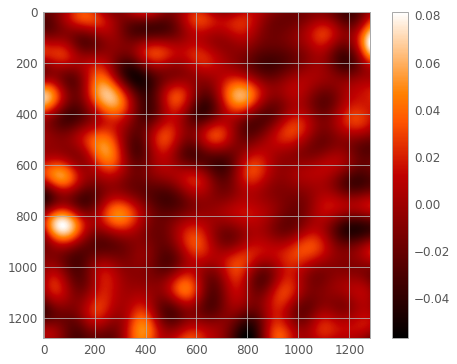

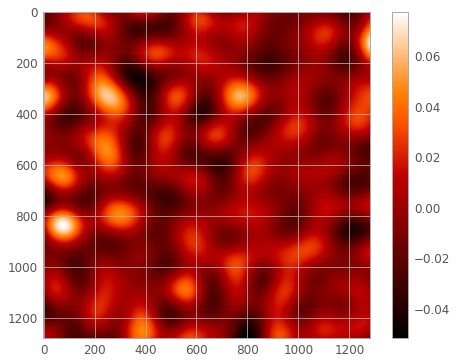

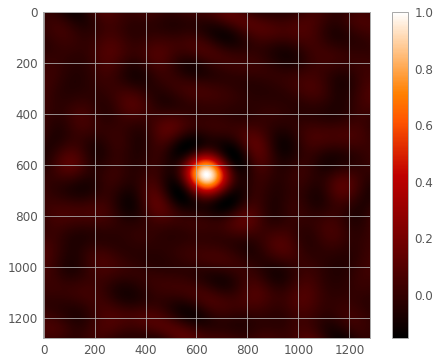

In [16]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits

def display_img(image_file):
    # display the structure of the file
    fits.info(image_file)
    # read the image data from this first extension
    image_data = fits.getdata(image_file, ext=0)
    # data is now stored as a 2D numpy array
    print(image_data.shape)
    # display the image data
    plt.figure()
    plt.imshow(image_data.squeeze())
    plt.colorbar()


image_file="test-dirty.fits"
display_img(image_file)
image_file="test-image.fits"
display_img(image_file)
image_file="test-psf.fits"
display_img(image_file)
plt.show()